# Tasca 6: Visualització gràfica d'un dataset

En el siguiente Notebook voy a hacer una descripción del dataset que usamos en la tarea 5 delayed_flights.

In [1]:
# Carga de librerías

# Data wrangling
#------------------------------------------------------
import numpy as np
import pandas as pd

# Graficos
#------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
# Tipos que quiero que infiera Pandas
vuelos_c_tipos={'Year':'int32',
               'Month':'uint8',
               'Day':'uint8',
               'DayOfWeek':'uint8',
               'Dep_Hour_of_the_day':'uint8',
               'Diverted':'uint8',
               'Cancelled':'uint8',
               'UniqueCarrier':'category',
               'TailNum':'category',
               'Origin':'category',
               'Dest':'category',
               'CancellationCode':'category',
               'Is_delayed':'category',
               'Faster_than_estimated':'category',
               'DayOfYear':'int32',
               'state_or':'category',
                'country':'category',
                'state_dest':'category'}

In [3]:
# Ingesta archivo preparado vuelos_c.csv

df=pd.read_csv('..\\t5\\vuelos_c.csv',sep=',',dtype=vuelos_c_tipos)

In [4]:
# Elimino la primera columna
df.drop(columns=['Unnamed: 0','Year','Date'],inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936756 entries, 0 to 1936755
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   DayOfYear              int32   
 1   Month                  uint8   
 2   Day                    uint8   
 3   DayOfWeek              uint8   
 4   Dep_Hour_of_the_day    uint8   
 5   Is_delayed             category
 6   ArrDelay               float64 
 7   DepDelay               float64 
 8   UniqueCarrier          category
 9   CarrierName            object  
 10  TailNum                category
 11  engine_type            object  
 12  YearOfManufact         float64 
 13  Faster_than_estimated  category
 14  Speed_mph              float64 
 15  Origin                 category
 16  Dest                   category
 17  FlightNum              int64   
 18  Distance               int64   
 19  path                   object  
 20  city_or                object  
 21  state_or               category

In [6]:
df.head(3)

,DayOfYear,Month,Day,DayOfWeek,Dep_Hour_of_the_day,Is_delayed,ArrDelay,DepDelay,UniqueCarrier,CarrierName,...,city_dest,state_dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3,1,3,4,19,No,-14.0,8.0,WN,Southwest Airlines Co.,...,Tampa,FL,0,N,0,NaN,NaN,NaN,NaN,NaN
1,3,1,3,4,7,Yes,2.0,19.0,WN,Southwest Airlines Co.,...,Tampa,FL,0,N,0,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,6,Yes,14.0,8.0,WN,Southwest Airlines Co.,...,Baltimore,MD,0,N,0,NaN,NaN,NaN,NaN,NaN


## Nivell 1
 Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

1. Una variable categòrica (UniqueCarrier).
2. Una variable numèrica (ArrDelay).
3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier).
4. Dues variables numèriques (ArrDelay i DepDelay).
5. Tres variables (ArrDelay, DepDelay i UniqueCarrier).
6. Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).



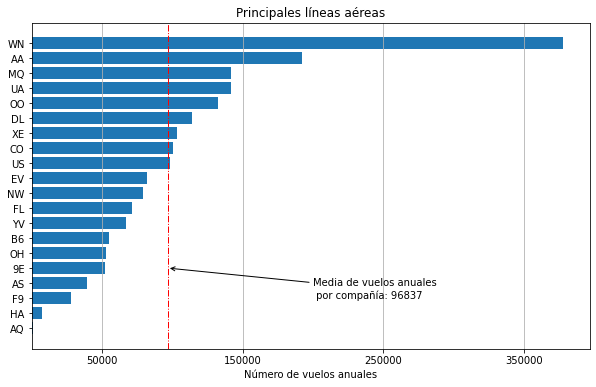

In [7]:
# Una variable categòrica (UniqueCarrier)
# Crear el área
fig,ax = plt.subplots(figsize=(10,6))

# Preparar los datos

figura1=df.UniqueCarrier.value_counts().sort_values()

# Dibujar el gráfico de barras

uniquecarrier= ax.barh(y= figura1.index,
                       width=figura1.values,)

# Customizar la imagen
# Dibujar una línea vertical con el valor de la media de vuelos
ax.axvline(x=figura1.values.mean(),
           color='r',
           linestyle='-.',
           linewidth= 1)
# Anotación
ax.annotate('Media de vuelos anuales\n por compañía: '+str(int(figura1.values.mean())),
            xy=(figura1.values.mean(),4),
            xytext=(200000,2),
            arrowprops=dict(arrowstyle='->'))
# Títulos
ax.set(title='Principales líneas aéreas',
       xlabel='Número de vuelos anuales',)

# Configurar Grid
ax.grid(True, which='major', axis='x')
ax.set_xticks(ticks=[50000,150000,250000,350000], minor=False)

# Guardar imagen
plt.savefig('Volumen_de_trafico_anual_Carriers',dpi=200)



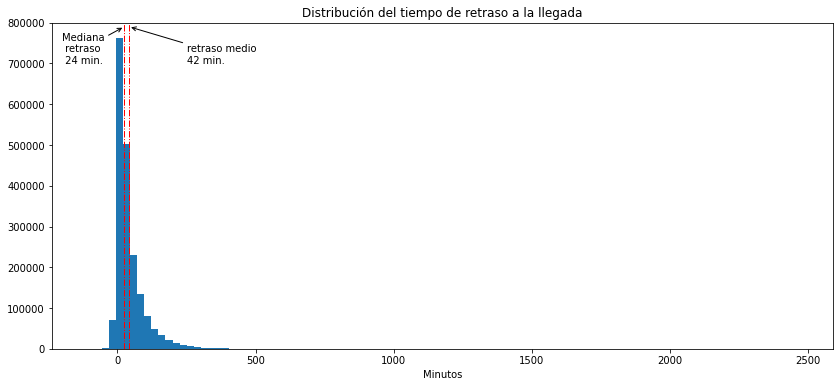

In [8]:
# 2. Una variable numèrica (ArrDelay)

# Crear la figura
fig,ax = plt.subplots(figsize=(14,6))

# Preparar los datos

# Crear el gráfico

ax.hist(df.ArrDelay,
         bins=100, )

# Customizar el gráfico
# Anotación tiempo medio
ax.axvline(df.ArrDelay.mean(),color='r',linestyle='-.',linewidth= 1)
ax.annotate(text='retraso medio \n'+str(int(df.ArrDelay.mean()))+' min.',
            xy=(df.ArrDelay.mean(),790000),xytext=(250,700000),
            arrowprops=dict(arrowstyle='->'))


# Anotación mediana de retraso
ax.axvline(df.ArrDelay.median(),color='r',linestyle='-.',linewidth= 1)
ax.annotate(text='Mediana\n retraso\n '+str(int(df.ArrDelay.median()))+' min.',
            xy=(df.ArrDelay.median(),790000),xytext=(-200,700000),
            arrowprops=dict(arrowstyle='->'))

#Títulos
ax.set(title='Distribución del tiempo de retraso a la llegada',
       xlabel='Minutos')

# Guardar imagen
plt.savefig('distribucion_ArrDelay',dpi=200)




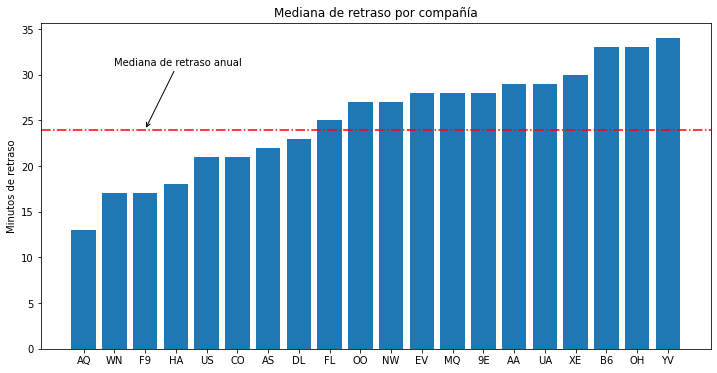

In [9]:
# 3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

# Crear la figura
fig,ax= plt.subplots(figsize=(12,6))

# Preparar los datos
figura3=df.groupby('UniqueCarrier').ArrDelay.median().sort_values()

# Dibujar el gráfico
ax.bar(x=figura3.index,
       height=figura3.values,)

# Customizar la imagen
# Añadir titulos
ax.set(title='Mediana de retraso por compañía',
       ylabel='Minutos de retraso',)

# Anotaciones
# Linea horizontal
ax.axhline(df.ArrDelay.median(),color='r',linestyle='-.')
# Anotación
ax.annotate('Mediana de retraso anual',
           xy=(2,df.ArrDelay.median()),
           xytext=(1,31),
          arrowprops=dict(arrowstyle='->'))


# Guardar imagen
plt.savefig('valor_mediano_ArrDelay_por_compañia',dpi=200)




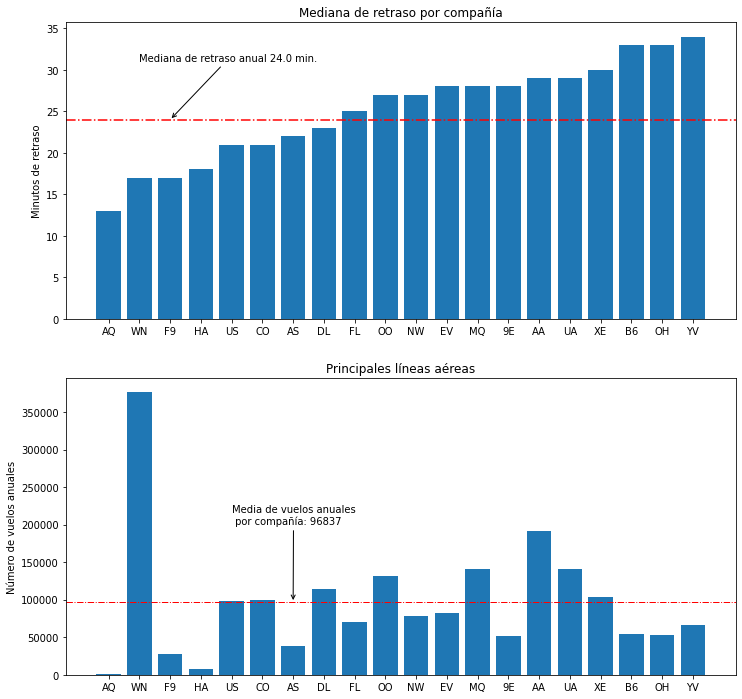

In [10]:
# 3.1. Fusionar los dos gráficos anteriores para comparar si las compañías con más
#      retrasos son las compañías con más vuelos.

# Crear la figura
fig,(ax1,ax2)= plt.subplots(figsize=(12,12),nrows=2,ncols=1,sharex=False)

# Preparar los datos
figura31=df.groupby('UniqueCarrier').ArrDelay.agg(['median','count']).sort_values(by='median')
# Ax1
# Dibujar el gráfico
ax1.bar(x=figura31.index,
       height=figura31['median'],)

# Customizar la imagen
# Añadir titulos
ax1.set(title='Mediana de retraso por compañía',
       ylabel='Minutos de retraso',)

# Anotaciones
# Linea horizontal
ax1.axhline(df.ArrDelay.median(),color='r',linestyle='-.')
# Anotación
ax1.annotate('Mediana de retraso anual '+str(df.ArrDelay.median())+' min.',
           xy=(2,df.ArrDelay.median()),
           xytext=(1,31),
          arrowprops=dict(arrowstyle='->'))

#Ax2

# Dibujar el gráfico
ax2.bar(x= figura31.index,
        height=figura31['count'],)

# Customizar la imagen
# Dibujar una línea vertical con el valor de la media de vuelos
ax2.axhline(y=figura1.values.mean(),
           color='r',
           linestyle='-.',
           linewidth= 1)
# Anotación
ax2.annotate('Media de vuelos anuales\n por compañía: '+str(int(figura1.values.mean())),
            xy=(6,figura1.values.mean()),
            xytext=(4,200000),
            arrowprops=dict(arrowstyle='->'))
# Títulos
ax2.set(title='Principales líneas aéreas',
       ylabel='Número de vuelos anuales',);


# Guardar imagen
#plt.savefig('valor_mediano_ArrDelay_por_compañia',dpi=200)



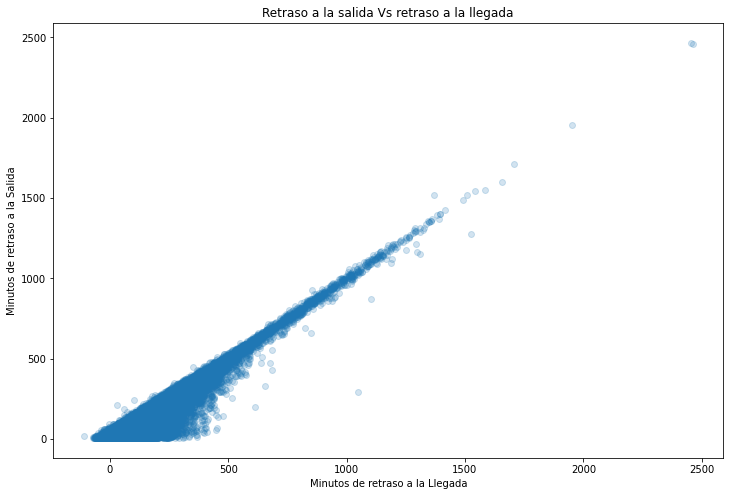

In [11]:
# 4. Dues variables numèriques (ArrDelay i DepDelay).
# Creo el gráfico
fig, ax =plt.subplots(figsize=(12,8))

# Preparo los datos

# Dibujo el gráfico
ax.scatter(x= df.ArrDelay,
           y= df.DepDelay,
           alpha=0.2);

# Customimzo el gráfico
ax.set(title='Retraso a la salida Vs retraso a la llegada',
       xlabel='Minutos de retraso a la Llegada',
       ylabel='Minutos de retraso a la Salida')

# Guardar imagen
plt.savefig('ArrDelay_VS_DepDelay',dpi=200)




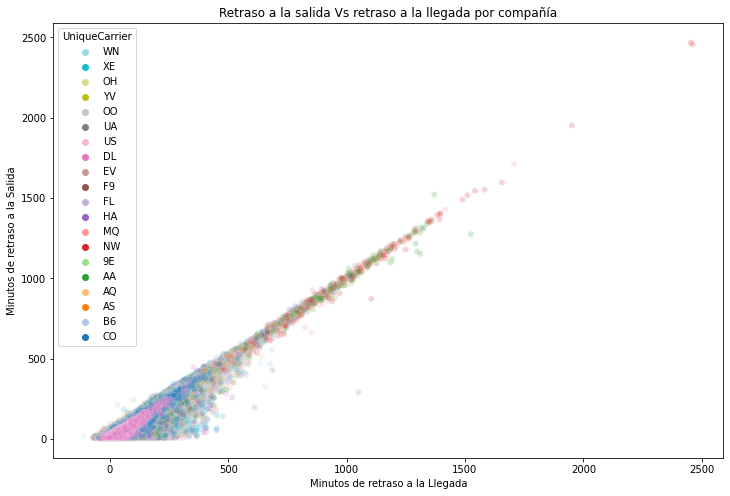

In [12]:
# 5.Tres variables (ArrDelay, DepDelay i UniqueCarrier).
# Creo el gráfico
fig, ax =plt.subplots(figsize=(12,8))

# Preparo los datos

# Dibujo el gráfico
sns.scatterplot(data=df,
                x= 'ArrDelay',
                y= 'DepDelay',
                hue= 'UniqueCarrier',
                alpha=0.2,
                palette='tab20_r',
                ax=ax);

# Customimzo el gráfico
ax.set(title='Retraso a la salida Vs retraso a la llegada por compañía',
       xlabel='Minutos de retraso a la Llegada',
       ylabel='Minutos de retraso a la Salida');





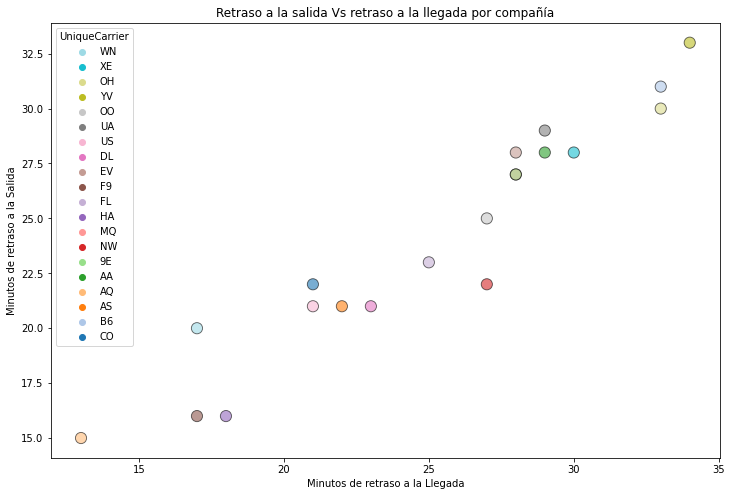

In [13]:
# 5.1. Tres variables (ArrDelay, DepDelay i UniqueCarrier).
# Creo el gráfico
fig, ax =plt.subplots(figsize=(12,8))

# Preparo los datos
figura51=df.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].median()

# Dibujo el gráfico
sns.scatterplot(data=figura51,
                x= 'ArrDelay',
                y= 'DepDelay',
                hue= 'UniqueCarrier',
                alpha=0.6,
                s=125,
                palette='tab20_r',
                edgecolor='black',
                ax=ax);

# Customimzo el gráfico
ax.set(title='Retraso a la salida Vs retraso a la llegada por compañía',
       xlabel='Minutos de retraso a la Llegada',
       ylabel='Minutos de retraso a la Salida');


# Guardar imagen
plt.savefig('mediana_ArrDelay_VS_DepDelay_por_compañia',dpi=200)





In [14]:
df.groupby('UniqueCarrier').agg({'ArrDelay':'median', 
                                 'DepDelay':'median',
                                 'Day':'count'}).sort_values(by='ArrDelay')


,ArrDelay,DepDelay,Day
UniqueCarrier,,,
AQ,13.0,15.0,750
WN,17.0,20.0,377602
F9,17.0,16.0,28267
HA,18.0,16.0,7490
US,21.0,21.0,98425
CO,21.0,22.0,100195
AS,22.0,21.0,39293
DL,23.0,21.0,114238
FL,25.0,23.0,71284


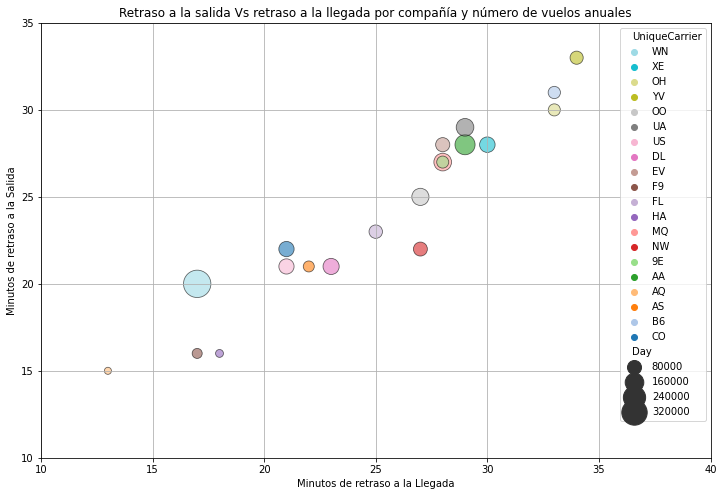

In [15]:
# 6.Més de tres variables (ArrDelay, DepDelay, Numero total de Vuelos i UniqueCarrier).

# Creo el gráfico
fig, ax =plt.subplots(figsize=(12,8))

# Preparo los datos

figura6 = df.groupby('UniqueCarrier').agg({'ArrDelay':'median', 
                                    'DepDelay':'median',
                                    'Day':'count'}).sort_values(by='ArrDelay')

# Dibujo el gráfico
sns.scatterplot(data=figura6,
                x= 'ArrDelay',
                y= 'DepDelay',
                hue= 'UniqueCarrier',
                size='Day',
                sizes=(50,750),
                alpha=0.6,
                palette='tab20_r',
                edgecolor='black',
                ax=ax);


# Customimzo el gráfico
ax.set(title='Retraso a la salida Vs retraso a la llegada por compañía y número de vuelos anuales',
       xlabel='Minutos de retraso a la Llegada',
       ylabel='Minutos de retraso a la Salida');
ax.grid(True)
ax.set_xlim(left=10,right=40)
ax.set_ylim(bottom=10,top=35)

# Guardo la imagen
plt.savefig('mediana_ArrDelay_VS_DepDelay_por_compañia_numVuelos',dpi=200)


## Otras visualizaciones

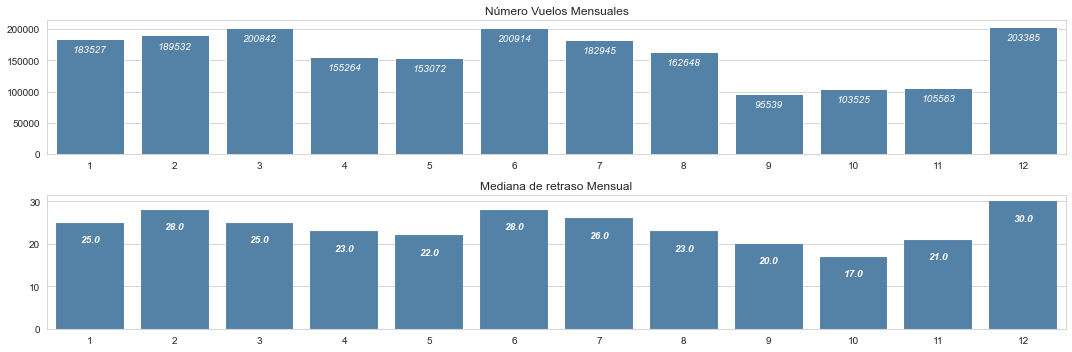

In [16]:
sns.set_style('whitegrid')
# Diagrama 
# 1. Preparo datos
#datos

# 2. Creo fig y axes.
fig, ax=plt.subplots(ncols=1,nrows=2,figsize=(15, 5),tight_layout=True)

# 3. Creo Plot
# Axes (0) - Vuelos mensuales
VxM=sns.countplot(data=df,
                  x='Month',
                  color='steelblue',
                  
                  ax=ax[0])
# Títulos
VxM.set(title='Número Vuelos Mensuales',
          ylabel=None,
          xlabel=None);

# Anotaciones
for i in range(12):
    VxM.annotate(text=(df.groupby('Month')['Day'].count().iloc[i]),
                  xy=(i,df.groupby('Month')['Day'].count().iloc[i]-10000),
                  xycoords='data',
                  ha='center',
                  va='top',
                  color='w',
                # weight='bold',
                  fontstyle='oblique');


# Axes (1) - Retrasos mensuales
DxM=sns.barplot(data=df.groupby('Month')['ArrDelay'].median().reset_index(),
                x='Month',
                y='ArrDelay',
                color='steelblue',
                linewidth=0.1,
                ax=ax[1])
# Títulos
DxM.set(title='Mediana de retraso Mensual',
          ylabel=None,
          xlabel=None);

# Ax1 Anotaciones
for i in range(12):
    DxM.annotate(text=(df.groupby('Month')['ArrDelay'].median().iloc[i]),
                  xy=(i,df.groupby('Month')['ArrDelay'].median().iloc[i]-3),
                  xycoords='data',
                  ha='center',
                  va='top',
                  color='w',
                  weight='bold',
                  fontstyle='oblique');
    

<AxesSubplot:xlabel='Day', ylabel='Month'>

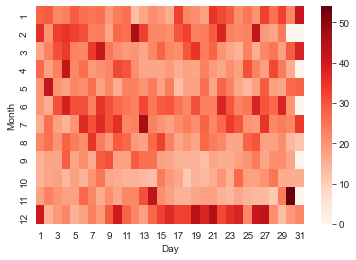

In [17]:
# Heatmap retraso medio por día y mes
mapeo=df.groupby(['Month','Day'])[['ArrDelay']].median().reset_index()
mapeo=mapeo.pivot(index='Month',columns='Day',values='ArrDelay').fillna(0)
sns.heatmap(mapeo,
            cmap='Reds')

<AxesSubplot:xlabel='Day', ylabel='Month'>

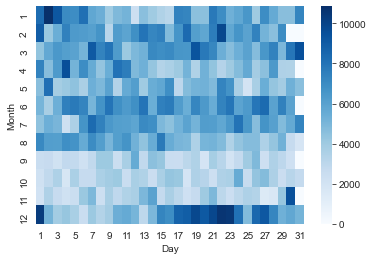

In [18]:
# Heatmap con el número de vuelos por día y mes
vueleteo=df.groupby(['Month','Day'])[['ArrDelay']].count().reset_index()
vueleteo=vueleteo.pivot(index='Month',columns='Day',values='ArrDelay').fillna(0)
sns.heatmap(vueleteo,
            cmap='Blues')

### Exercici 2
Exporta els gràfics com imatges o com html.

### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

### Exercici 4
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

Se puede ver una integración de las visualizaciones en el siguiente [enlace].

[enlace]: https://github.com/JuAC-ITAcademy/2008_USA_flight_delays/blob/main/flight_delays.ipynb